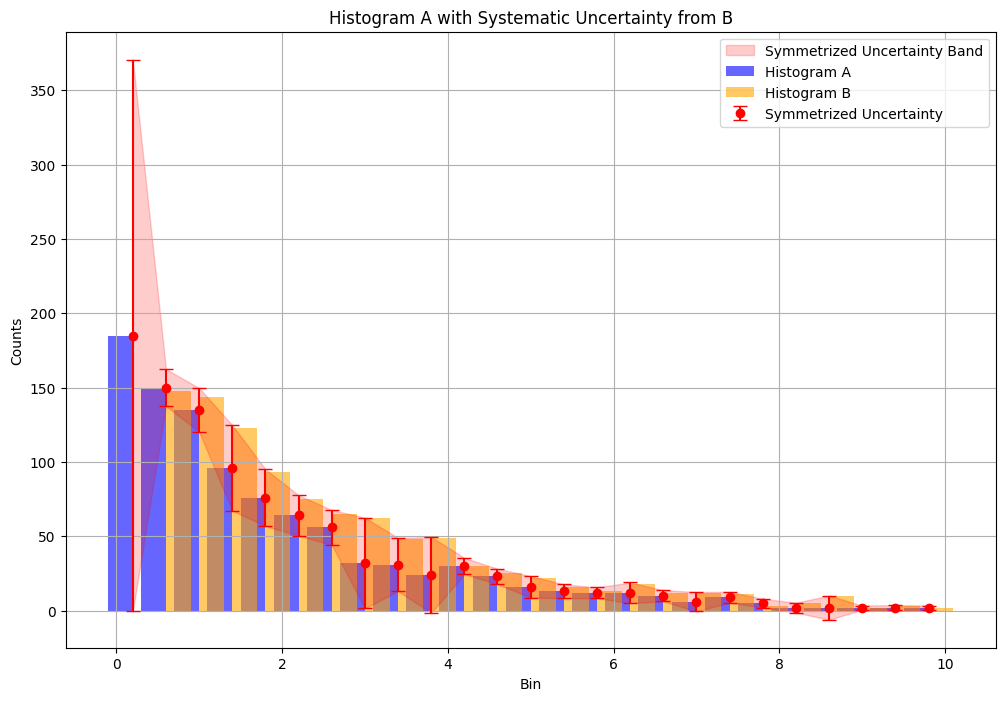

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate skewed left distributions for A and B
np.random.seed(0)
A_samples = np.random.exponential(scale=2.0, size=1000)
B_samples = np.random.exponential(scale=2.0, size=1000) + 0.5  # Slightly shifted

# Create histograms with 25 bins
bins = np.linspace(0, 10, 26)
A, _ = np.histogram(A_samples, bins=bins)
B, _ = np.histogram(B_samples, bins=bins)

# Calculate the Poisson uncertainties for A
sigma_A = np.sqrt(A)

# Calculate the systematic uncertainties from B
sigma_sys = np.abs(A - B)

# Calculate the total symmetrized uncertainties
sigma_total = np.sqrt(sigma_A**2 + sigma_sys**2)

# Define the bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot the histograms
plt.figure(figsize=(12, 8))
plt.bar(bin_centers - 0.15, A, width=0.3, label='Histogram A', color='blue', alpha=0.6)
plt.bar(bin_centers + 0.15, B, width=0.3, label='Histogram B', color='orange', alpha=0.6)
plt.errorbar(bin_centers, A, yerr=sigma_total, fmt='o', color='red', label='Symmetrized Uncertainty', capsize=5)

# Add symmetrized uncertainty bands
plt.fill_between(bin_centers, A - sigma_total, A + sigma_total, color='red', alpha=0.2, label='Symmetrized Uncertainty Band')

# Add labels, legend, and title
plt.xlabel('Bin')
plt.ylabel('Counts')
plt.title('Histogram A with Systematic Uncertainty from B')
plt.legend()
plt.grid(True)
plt.show()


